<a href="https://colab.research.google.com/github/francescopandolfo/TESI_LM32/blob/main/variazione_relativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings("ignore")
pathDrive = 'drive/MyDrive/UNICT/_TESI/dati/'

#df = pd.read_csv('sample_data/dati_interpolati_diff_1d-2d_undsamp_7gg.csv', sep=';')
df = pd.read_csv(pathDrive + 'dati_interpolati_diff_1d-2d_8gg - fontane.csv', sep=';')
#df = pd.read_csv('tesi/dati_interpolati_diff_1d_undsamp_7gg_2classi.csv', sep=';')
#df = pd.read_csv('sample_data/dati_interpolati_diff_3d-3d_undsamp_7gg.csv', sep=';')

df['edam_ecne_eplu_diff'] = df['edam_ecne_eplu_diff'].str.replace(',','.').astype(float)#
df['edam_ecor_emcn_diff'] = df['edam_ecor_emcn_diff'].str.replace(',','.').astype(float)
df['edam_emsg_eplu_diff'] = df['edam_emsg_eplu_diff'].str.replace(',','.').astype(float)
df['edam_epdn_ecne_diff'] = df['edam_epdn_ecne_diff'].str.replace(',','.').astype(float)
df['edam_epdn_emcn_diff'] = df['edam_epdn_emcn_diff'].str.replace(',','.').astype(float)
df['eint_ecpn_emgl_diff'] = df['eint_ecpn_emgl_diff'].str.replace(',','.').astype(float)#
df['eint_esln_emgl_diff'] = df['eint_esln_emgl_diff'].str.replace(',','.').astype(float)
df['eint_esln_espc_diff'] = df['eint_esln_espc_diff'].str.replace(',','.').astype(float)
df['emeg_ecpn_emgl_diff'] = df['emeg_ecpn_emgl_diff'].str.replace(',','.').astype(float)
df['emfn_ecor_ecri_diff'] = df['emfn_ecor_ecri_diff'].str.replace(',','.').astype(float)
df['emfn_ecor_emcn_diff'] = df['emfn_ecor_emcn_diff'].str.replace(',','.').astype(float)
df['emfn_emcn_epdn_diff'] = df['emfn_emcn_epdn_diff'].str.replace(',','.').astype(float)
df['epdn_ecne_ecpn_diff'] = df['epdn_ecne_ecpn_diff'].str.replace(',','.').astype(float)
df['epdn_eint_ecpn_diff'] = df['epdn_eint_ecpn_diff'].str.replace(',','.').astype(float)##
df['epdn_eint_espc_diff'] = df['epdn_eint_espc_diff'].str.replace(',','.').astype(float)
df['epdn_emfn_espc_diff'] = df['epdn_emfn_espc_diff'].str.replace(',','.').astype(float)
df['eplu_ecne_ecpn_diff'] = df['eplu_ecne_ecpn_diff'].str.replace(',','.').astype(float)
df['eplu_emeg_ecpn_diff'] = df['eplu_emeg_ecpn_diff'].str.replace(',','.').astype(float)
df['eplu_emeg_emal_diff'] = df['eplu_emeg_emal_diff'].str.replace(',','.').astype(float)
df['eplu_emsg_emal_diff'] = df['eplu_emsg_emal_diff'].str.replace(',','.').astype(float)

_dftarget = df['evento'].astype(int).values

format = '%d/%m/%Y'
df['date'] = pd.to_datetime(df['day'], format=format)
df = df.set_index('date')
df = df.drop(columns=['day'])
df = df.drop(columns=['evento'])

for i in reversed(range(len(df.columns))):
  if df.dtypes[df.columns[i]] == 'object':
    df = df.drop(df.columns[i], axis=1)

normalized_df = (df - df.mean()) / df.std()
df = normalized_df

print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2021-02-08 to 2021-04-01
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edam_ecne_eplu_diff  53 non-null     float64
 1   edam_ecor_emcn_diff  53 non-null     float64
 2   edam_emsg_eplu_diff  53 non-null     float64
 3   edam_epdn_ecne_diff  53 non-null     float64
 4   edam_epdn_emcn_diff  53 non-null     float64
 5   eint_ecpn_emgl_diff  53 non-null     float64
 6   eint_esln_emgl_diff  53 non-null     float64
 7   eint_esln_espc_diff  53 non-null     float64
 8   emeg_ecpn_emgl_diff  53 non-null     float64
 9   emfn_ecor_ecri_diff  53 non-null     float64
 10  emfn_ecor_emcn_diff  53 non-null     float64
 11  emfn_emcn_epdn_diff  53 non-null     float64
 12  epdn_ecne_ecpn_diff  53 non-null     float64
 13  epdn_eint_ecpn_diff  53 non-null     float64
 14  epdn_eint_espc_diff  53 non-null     float64
 15  epdn_emfn_espc_diff  5

In [101]:
#mm/dd/yyyy

#The 1986–2021 paroxysmal episodes at the summit craters of Mt. Etna: Insights into volcano dynamics and hazard
#Daniele Andronico, Andrea Cannata, Giuseppe Di Grazia, Ferruccio Ferrari - 2021

#LF Lava Fountain
LF = ['02/18/2021','02/19/2021','02/21/2021','02/24/2021',
           '03/02/2021','03/10/2021','03/15/2021','03/17/2021','03/24/2021','04/01/2021']

#LSLF Large-Scale Lava Fountain
LSLF = ['02/16/2021','02/23/2021','02/28/2021','03/04/2021','03/07/2021','03/12/2021','03/19/2021']

#TA Transitional Activity
TA = ['04/19/2020','12/13/2020','12/21/2020','12/22/2020','01/18/2021']

#Etna Output Rate during the Last Decade (2011–2022)
#Sonia Calvari and Giuseppe Nunnari
#EA Eruptive activity
EA = [
    '01/21/2019', '01/22/2019', '01/23/2019', '01/24/2019', '01/25/2019', '01/26/2019', '01/27/2019',
    '01/28/2019', '01/29/2019', '01/30/2019', '01/31/2019', '02/01/2019', '02/02/2019', '02/03/2019',
    '04/29/2019', '04/30/2019', '05/01/2019', '05/02/2019', '05/03/2019', '05/04/2019', '05/05/2019',
    '05/30/2019', '05/31/2019', '06/01/2019', '06/02/2019',
    '07/18/2019', '07/19/2019', '07/20/2019', '07/21/2019',
    '07/27/2019', '07/28/2019',
    '07/29/2019', '07/30/2019', '07/31/2019', '08/01/2019', '08/02/2019', '08/03/2019', '08/04/2019', #da analisi video: no esplosioni, solo attività locale
    #'08/19/2019', '08/20/2019', '08/21/2019', '08/22/2019', '08/23/2019', '08/24/2019', '08/25/2019',
    #'12/23/2019', '12/24/2019',
    '12/25/2019', '12/26/2019', '12/27/2019', '12/28/2019', '12/29/2019', '12/30/2019',
    #'04/29/2020', '05/06/2020', #solo deformazione?? no eventi vulcanici
    '12/07/2020', '12/08/2020','12/09/2020', '12/10/2020', '12/11/2020', '12/12/2020', '12/13/2020', '12/14/2020',
    '12/21/2020', '12/22/2020',
    '01/18/2021'

]


#Combined Seismic and Geodetic Analysis Before, During, and After the 2018 Mount Etna Eruption
#M. Mattia, V. Bruno, E. Montgomery‐Brown, D. Patanè, G. Barberi and M. Coltelli - 2020

#DI dike intrusion
DI = ['12/24/2018']

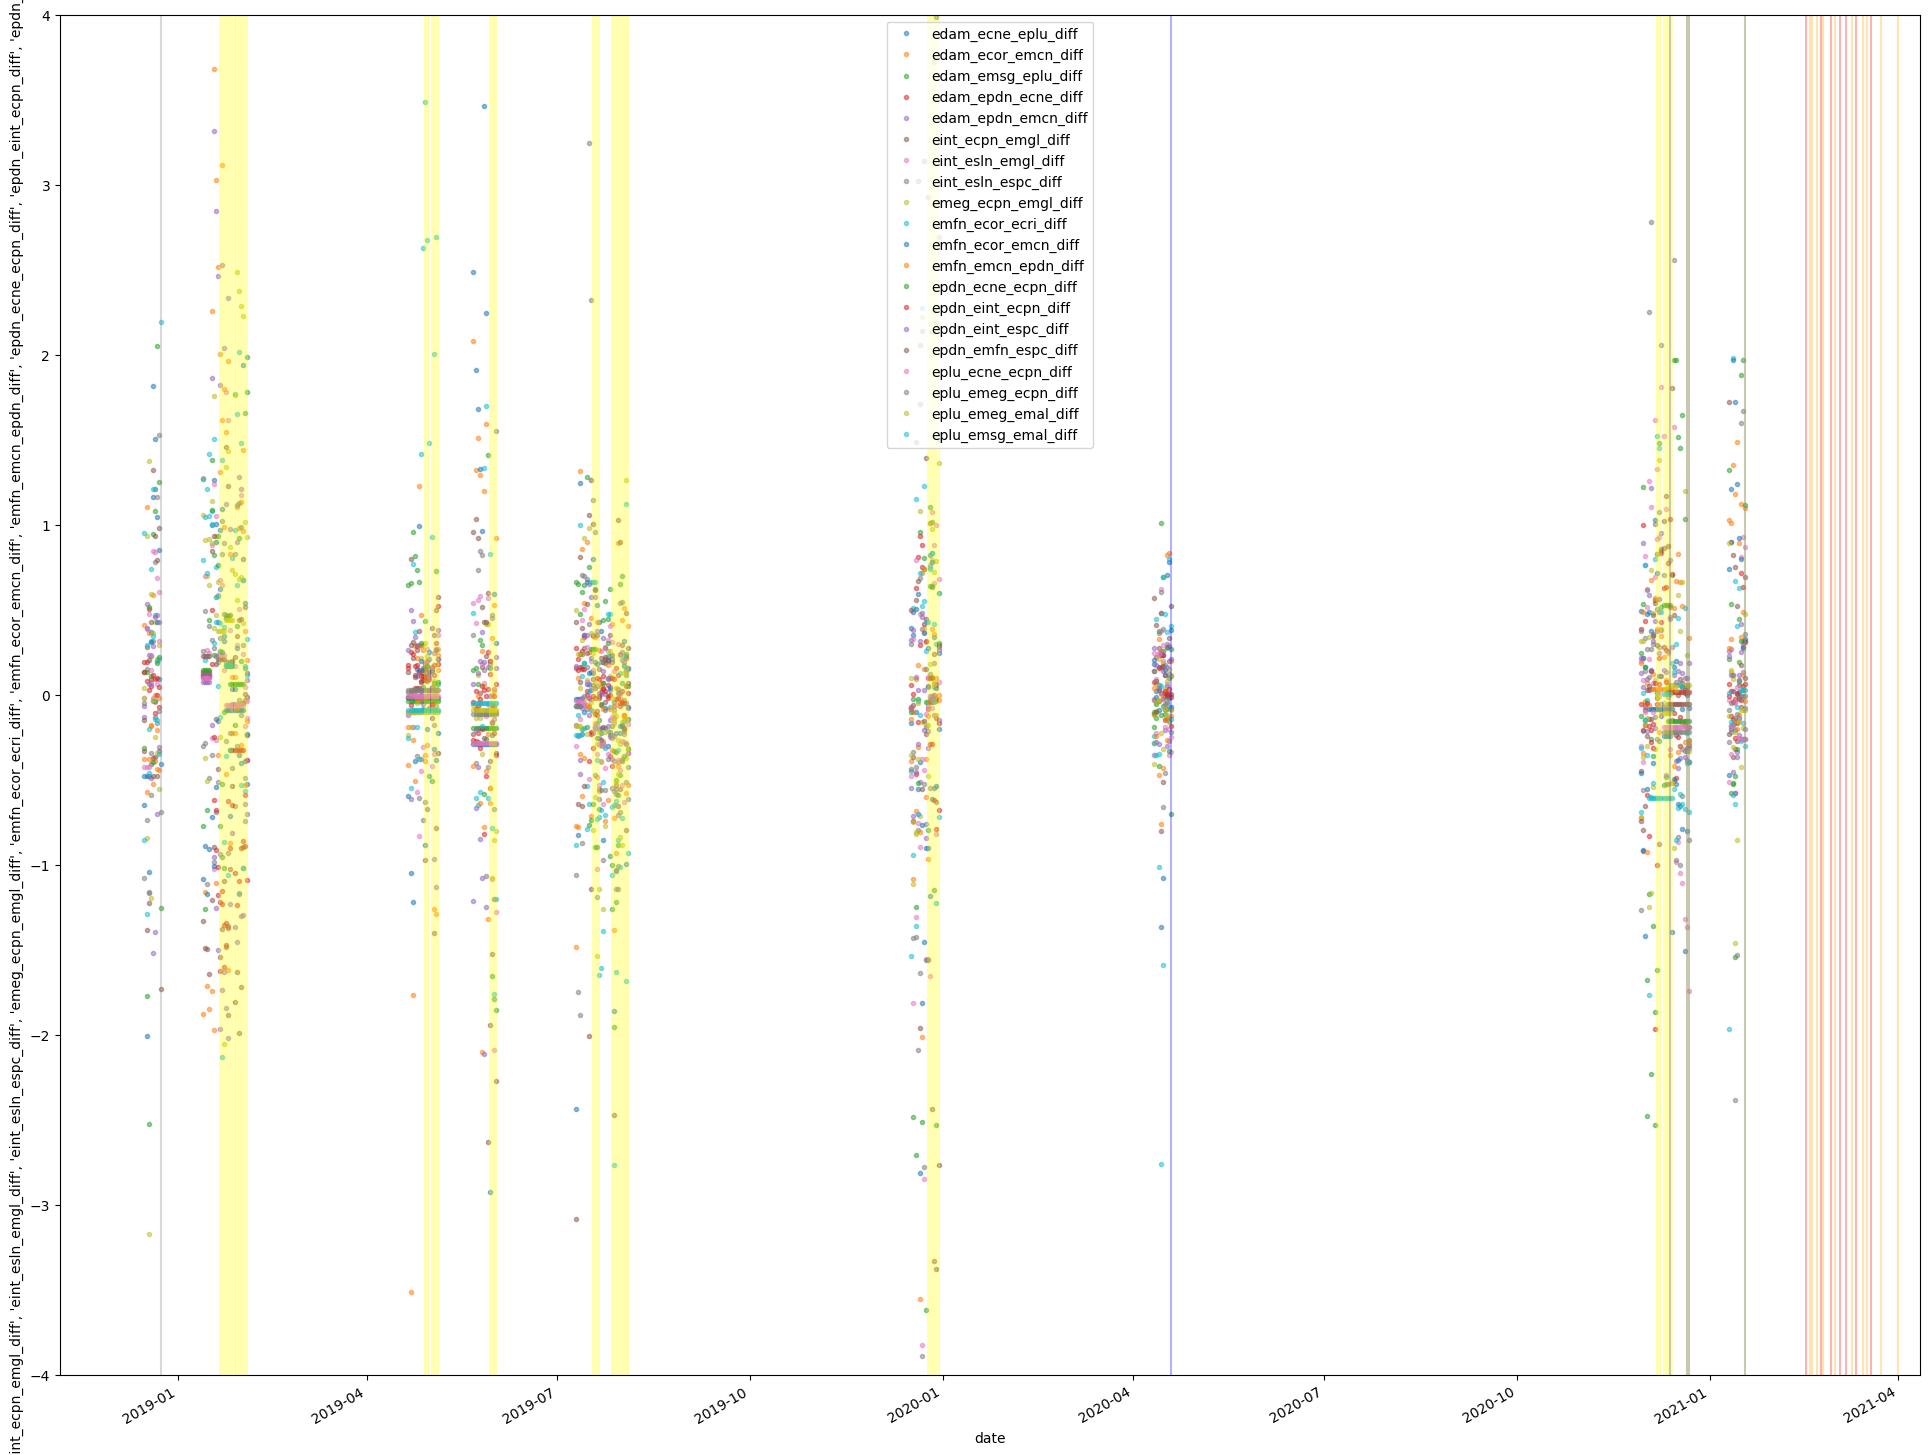

In [102]:
df.plot(figsize=(24,20), marker = ".", linewidth=0, alpha = 0.5)
plt.xlabel('date')
plt.ylabel([
    'edam_ecne_eplu_diff',
    'edam_ecor_emcn_diff',
    'edam_emsg_eplu_diff',
    'edam_epdn_ecne_diff',
    'edam_epdn_emcn_diff',
    'eint_ecpn_emgl_diff',
    'eint_esln_emgl_diff',
    'eint_esln_espc_diff',
    'emeg_ecpn_emgl_diff',
    'emfn_ecor_ecri_diff',
    'emfn_ecor_emcn_diff',
    'emfn_emcn_epdn_diff',
    'epdn_ecne_ecpn_diff',
    'epdn_eint_ecpn_diff',
    'epdn_eint_espc_diff',
    'epdn_emfn_espc_diff',
    'eplu_ecne_ecpn_diff',
    'eplu_emeg_ecpn_diff',
    'eplu_emeg_emal_diff',
    'eplu_emsg_emal_diff'
])

plt.ylim(-4, 4)

events_alpha = 0.3

for f in LF:
    plt.axvline(x=f, color='orange', alpha = events_alpha)

for f in LSLF:
    plt.axvline(x=f, color='red', alpha = events_alpha)

for f in TA:
    plt.axvline(x=f, color='blue', alpha = events_alpha)

for f in EA:
    plt.axvline(x=f, color='yellow', alpha = events_alpha)

for f in DI:
    plt.axvline(x=f, color='gray', alpha = events_alpha)

plt.show()


# Verifico adesso quali sono le feature che maggiormente sono correlate con il target (pre-evento, evento), e lo calcolo solo sul set di allenamento

In [ ]:
#sottraggo il relativo valore medio a tutti i valori delle osservazioni
X_train_ext_mean = torch.mean(X_train_ext, dim=0)
X_train_ext_mean = X_train_ext_mean.unsqueeze(0)
X_train_ext_cent = X_train_ext - X_train_ext_mean

#calcolo la matrice di covarianza
n_obs = X_train_ext_cent[:,0].size()[0]-1
covMatrix_train_ext = (X_train_ext_cent.t() @ X_train_ext_cent) / n_obs
#print(covMatrix_train_ext)

#calcolo la correlazione tra le features e il target (prezzo della casa)
#per evitare calcoli inutili creo solo un vettore con la correlazione tra il target e tutte le feature
num_features = X_train_ext.shape[1]
corrMatrix_train_ext = torch.rand(1, num_features)
i = num_features - 1  #al posto di #for i in range(num_features):
for j in range(num_features):
  sigma_i = X_train_ext[:,i].std()
  sigma_j = X_train_ext[:,j].std()
  corrMatrix_train_ext[0][j] = covMatrix_train_ext[i][j] / (sigma_i * sigma_j)
#print(corrMatrix_train_ext)

# Plot corr. matrix ext
plt.figure(figsize=(6, 5))
ax = plt.gca()
#plt.title('Correlazione tra le features e il target (prezzo della casa)')
ax.matshow(corrMatrix_train_ext, cmap=plt.cm.bwr)
for i in range(corrMatrix_train_ext.size(0)):
    for j in range(corrMatrix_train_ext.size(1)):
        c = f"{corrMatrix_train_ext[i,j].item():.2f}"
        ax.text(j, i, str(c), va='center', ha='center')
        ax.set_yticks([])

In [98]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [146]:
y = _dftarget
split_at = 45
plottare = False

max_f1_score = 0
max_f1_score_who = ""
max_accuracy_score = 0
max_accuracy_score_who = ""

for i in range(20):
  for j in range(20):
    for a in range(20):
    #  for b in range(20):

      #if i!=j and i!=a and j!=a:
      if i==0 and j==1 and a==12:

        X = df.values[:, [i,j,a]]
        who = "area " + str(i) + " - " + str(j) + " - " + str(a) + " : "

        #print(X)

        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

        X_train = X[:split_at]
        X_test = X[split_at:]

        y_train = y[:split_at]
        y_test = y[split_at:]

        #print(y_test)

        # standardizzazione
        #from sklearn.preprocessing import StandardScaler
        #sc = StandardScaler()
        #sc.fit(X_train)
        #X_std = sc.transform(X)
        #X_train_std = sc.transform(X_train)
        #X_test_std = sc.transform(X_test)

        # addestramento
        lr = LogisticRegression(C=100.0, random_state=0, class_weight='balanced') #parametro C è l'inverso della regolarizzazione; pertanto, se riduco il valore C, incremento la regolarizzazione; e viceversa
        #lr = LogisticRegression(C=100.0, random_state=0) #parametro C è l'inverso della regolarizzazione; pertanto, se riduco il valore C, incremento la regolarizzazione; e viceversa
        lr.fit(X_train, y_train)

        y_pred = [None] * len(X_train)

        for xx in range(0,len(X_train)):
          z = np.array([X_train[xx]])
          y_pred[xx] = lr.predict(z)

        # metriche
        fi_s = f1_score(y_train, y_pred, average='micro') * 100 #micro, macro, weighted
        acc_s = accuracy_score(y_train, y_pred) * 100

        if fi_s > max_f1_score:
          max_f1_score = fi_s
          max_f1_score_who = who + str(fi_s)

        if acc_s > max_accuracy_score:
          max_accuracy_score = acc_s
          max_accuracy_score_who = who + str(acc_s)
          conf_mat = confusion_matrix(y_train, y_pred)


        # visualizzazione grafica della classificazione
        if plottare:
          plot_decision_regions(X_train, y_train, clf=lr, legend=2)
          plt.xlabel('ppm st'+ str(i) )
          plt.ylabel('ppm st'+ str(j) )
          plt.legend(loc='upper left')
          plt.show()

print( max_f1_score_who )
print( max_accuracy_score_who )
print( conf_mat )



area 0 - 1 - 12 : 68.88888888888889
area 0 - 1 - 12 : 68.88888888888889
[[22  7]
 [ 7  9]]


In [145]:
plottare = False
max_f1_score = 0
max_f1_score_who = ""
max_accuracy_score = 0
max_accuracy_score_who = ""
#conf_mat =

for i in range(20):
  for j in range(20):
    for a in range(20):
    #  for b in range(20):

      if i!=j and i!=a and j!=a:
      #if i==6 and j==16 and a==18:
        X = df.values[:, [i,j,a]]
        who = "area " + str(i) + " - " + str(j) + " - " + str(a) + " : "

        #print(X)

        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

        X_train = X[:split_at]
        X_test = X[split_at:]

        y_train = y[:split_at]
        y_test = y[split_at:]

        #print(y_test)

        # standardizzazione
        #from sklearn.preprocessing import StandardScaler
        #sc = StandardScaler()
        #sc.fit(X_train)
        #X_std = sc.transform(X)
        #X_train_std = sc.transform(X_train)
        #X_test_std = sc.transform(X_test)

        # addestramento
        lr = LogisticRegression(C=100.0, random_state=0, class_weight='balanced') #parametro C è l'inverso della regolarizzazione; pertanto, se riduco il valore C, incremento la regolarizzazione; e viceversa
        #lr = LogisticRegression(C=100.0, random_state=0) #parametro C è l'inverso della regolarizzazione; pertanto, se riduco il valore C, incremento la regolarizzazione; e viceversa
        lr.fit(X_train, y_train)

        y_pred = [None] * len(X_test)

        for xx in range(0,len(X_test)):
          z = np.array([X_test[xx]])
          y_pred[xx] = lr.predict(z)


        # metriche
        fi_s = f1_score(y_test, y_pred, average='micro') * 100 #micro, macro, weighted
        acc_s = accuracy_score(y_test, y_pred) * 100


        if fi_s > max_f1_score:
          max_f1_score = fi_s
          max_f1_score_who = who + str(fi_s)

        if acc_s > max_accuracy_score:
          max_accuracy_score = acc_s
          max_accuracy_score_who = who + str(acc_s)
          conf_mat = confusion_matrix(y_test, y_pred)

        # visualizzazione grafica della classificazione

        if plottare:
          plot_decision_regions(X_test, y_test, clf=lr, legend=2)
          plt.xlabel('ppm st'+ str(i) )
          plt.ylabel('ppm st'+ str(j) )
          plt.legend(loc='upper left')
          plt.show()

print( max_f1_score_who )
print( max_accuracy_score_who )
print( conf_mat )

area 0 - 1 - 12 : 100.0
area 0 - 1 - 12 : 100.0
[[7 0]
 [0 1]]
